In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import ast
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
import json
import re


In [15]:
#Importing dairy farm data
#https://docs.google.com/spreadsheets/d/1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ/edit?usp=sharing&ouid=107361503511592933314&rtpof=true&sd=true
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
#df = pd.read_excel(r'D:\clieNfarm_project\raw_data/dairy_farm_mastersheet_2018_2022.xlsx')
df['year'] = df['assessment_year'].str.strip().str[-4:]
df = df.replace(np.nan, None)
# 'LCF1_Dairy_2018', 'LCF4_Dairy_2018', 'LCF5_Dairy_2018', 'LCF6_Dairy_2018', 'LCF7_Dairy_2018', 'LCF8_Dairy_2018', 
# 'LCF9_Dairy_2018', 'LCF10_Dairy_2018', 'LCF2_Dairy_2018', 'LCF3_Dairy_2018', 'DF_Dairy_2018', 'IRE_Dairy_LCF2_2022', 
# 'IRE_Dairy_LCF3_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022', 
# 'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022'
df = df[df["assessment_year"].isin([
    'IRE_Dairy_LCF8_2022', 'LCF6_Dairy_2018', 'LCF2_Dairy_2018'
])]
df = df.replace('nan', '0', regex=True)
df['weight_of_transport'].fillna(0, inplace=True)
df['distance_covered'].fillna(0, inplace=True)
# Starting filling 
driver = webdriver.Chrome()
driver.maximize_window()
driver.get('https://app.coolfarmtool.org/account/login/?next=/')
username = '*****'
password = '******'
driver.find_element(By.XPATH,'//*[@id="id_username"]').send_keys(username)
driver.find_element(By.XPATH,'//*[@id="id_password"]').send_keys(password)
driver.find_element(By.XPATH, '//*[@id="login"]/p[3]/input[1]').click()
#driver.find_element(By.CSS_SELECTOR, '#release_notes_form > button').click()
#time.sleep(2)
# #Selecting parameters to measure
# driver.find_element(By.XPATH, '//*[@id="welcome-content"]/section/ul[1]/li[1]').click()
# #driver.find_element(By.CSS_SELECTOR, '#dialog_metrics > form > label:nth-child(1)').click()
# driver.find_element(By.CSS_SELECTOR, '#dialog_metrics > form > label:nth-child(2)').click()
# #Clicking OK button
# driver.find_element(By.CSS_SELECTOR, 'body > div:nth-child(10) > div.ui-dialog-buttonpane.ui-widget-content.ui-helper-clearfix > div > button').click()
# #driver.refresh()
#Deleting repositories
driver.find_element(By.CSS_SELECTOR, '#assessments > a').click()
#time.sleep(1)

# #Deleting previous repositories
# def delete_observation(observation_id):
#     delete_link = driver.find_element(By.ID, observation_id)
#     delete_link.click()


# # Find all delete links
# delete_links = driver.find_elements(By.CLASS_NAME, "delete-product")

# # Loop through delete links and delete observations
# for link in delete_links:
#     observation_id = link.get_attribute("id")
#     delete_observation(observation_id)
#     #time.sleep(2)
#     driver.find_element(By.CSS_SELECTOR, 'body > div.ui-dialog.ui-corner-all.ui-widget.ui-widget-content.ui-front.ui-resizable.ui-dialog-buttons > div.ui-dialog-buttonpane.ui-widget-content.ui-helper-clearfix > div > button:nth-child(1)').click()
# #time.sleep(2)


#Clicking on the dairy section 
driver.find_element(By.CSS_SELECTOR, '#top > nav > ul > li:nth-child(3) > a').click()
#time.sleep(3)
driver.find_element(By.CSS_SELECTOR, '#top > nav > ul > li:nth-child(3) > ul > li:nth-child(5) > a').click()

# Entering data in the CFT
# Entering data in the CFT
for index, row in df.iterrows():
    Select(driver.find_element(By.ID, "id_variety")).select_by_value("9")
    Select(driver.find_element(By.ID, "id_date_time")).select_by_value("1")
    Select(driver.find_element(By.ID, "id_date_month")).select_by_value("1")
    Select(driver.find_element(By.ID, "id_reporting_year")).select_by_value(str(row['year']))
    driver.find_element(By.ID, "id_name").clear()
    driver.find_element(By.ID, "id_name").send_keys(str(row['assessment_year']))
    driver.find_element(By.ID, "id_product_dry_value").clear()
    driver.find_element(By.ID, "id_product_dry_value").send_keys(str(row['total_milk_prdn_kg']))
    Select(driver.find_element(By.ID, "id_product_dry_unit")).select_by_value("7")
    driver.find_element(By.ID, "id_fat_content").clear()
    driver.find_element(By.ID, "id_fat_content").send_keys(str(row['fat_content_%']))
    Select(driver.find_element(By.ID, "id_protein_measure")).select_by_value("1")
    driver.find_element(By.ID, "id_protein_content").clear()
    driver.find_element(By.ID, "id_protein_content").send_keys(str(row['protein_content_%']))
    
    driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last').click()
    #time.sleep(2)
    
    # # Loop over the first 6 values in each sublist
    # web_table = driver.find_element(By.XPATH, '//*[@id="form_herd"]')
    # for row_index, row in enumerate(web_table.find_elements(By.XPATH, ".//tr")):
    #     cells = row.find_elements(By.XPATH, ".//td")
    #     if row_index != 0:

    # Entering herd weight data
    # Strip and split values to create lists
    on_farm_numbr_lst = row['on_farm_numbr'].strip('][').split(', ')
    on_farm_numbr_lst = [round(float(value)) if round(float(value)) != 0 else 1 for value in on_farm_numbr_lst]
    on_farm_liv_wt_lst = row['on_farm_liv_wt'].strip('][').split(', ')
    on_farm_liv_wt_lst = [round(float(value)) if round(float(value)) != 0 else 1 for value in on_farm_liv_wt_lst]
    sold_numbr_lst = row['sold_numbr'].strip('][').split(', ')
    sold_numbr_lst = [round(float(value)) for value in sold_numbr_lst]
    sold_liv_wt_lst = row['sold_liv_wt'].strip('][').split(', ')
    sold_liv_wt_lst = [round(float(value)) for value in sold_liv_wt_lst]
    purchased_numbr_lst = row['purchased_numbr'].strip('][').split(', ')
    purchased_numbr_lst = [round(float(value)) for value in purchased_numbr_lst]
    purchased_liv_wt_lst = row['purchased_liv_wt'].strip('][').split(', ')
    purchased_liv_wt_lst = [round(float(value)) for value in purchased_liv_wt_lst]
    
    # Iterate over the lists and fill the form fields
    for i in range(6):
        onfarm_num_id = f'id__cattle_herd_sections-{i}-animals'
        onfarm_liv_wt_id = f'id__cattle_herd_sections-{i}-live_weight_value'
        sold_num_id = f'id__cattle_herd_sections-{i}-sold_animals'
        sold_liv_wt_id = f'id__cattle_herd_sections-{i}-sold_weight_value'
        prchase_num_id = f'id__cattle_herd_sections-{i}-purchased_animals'
        prchase_liv_wt_id = f'id__cattle_herd_sections-{i}-purchased_weight_value'
        
        if i < len(on_farm_numbr_lst):
            driver.find_element(By.ID, onfarm_num_id).clear()
            driver.find_element(By.ID, onfarm_num_id).send_keys(on_farm_numbr_lst[i])
        
        if i < len(on_farm_liv_wt_lst):
            driver.find_element(By.ID, onfarm_liv_wt_id).clear()
            driver.find_element(By.ID, onfarm_liv_wt_id).send_keys(on_farm_liv_wt_lst[i])
        
        if i < len(sold_numbr_lst):
            driver.find_element(By.ID, sold_num_id).clear()
            driver.find_element(By.ID, sold_num_id).send_keys(sold_numbr_lst[i])
        
        if i < len(sold_liv_wt_lst):
            driver.find_element(By.ID, sold_liv_wt_id).clear()
            driver.find_element(By.ID, sold_liv_wt_id).send_keys(sold_liv_wt_lst[i])
        
        if i < len(purchased_numbr_lst):
            driver.find_element(By.ID, prchase_num_id).clear()
            driver.find_element(By.ID, prchase_num_id).send_keys(purchased_numbr_lst[i])
        
        if i < len(purchased_liv_wt_lst):
            driver.find_element(By.ID, prchase_liv_wt_id).clear()
            driver.find_element(By.ID, prchase_liv_wt_id).send_keys(purchased_liv_wt_lst[i])
    driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last').click()
    #time.sleep(2)

    #Entering grazing data
    # Strip and split values to create lists
    days_lst = row['days_for_grazing'].strip('][').split(', ')
    days_lst = [round(float(value)) if round(float(value)) != 0 else 1 for value in days_lst]
    hrs_lst = row['grazing_hrs_per_day'].strip('][').split(', ')
    hrs_lst = [round(float(value)) if round(float(value)) != 0 else 1 for value in hrs_lst]
    # Iterate over the lists and fill the form fields
    for i in range(6):
        days_id = f"id_form-{i}-days"
        hrs_day_id = f"id_form-{i}-hours"

        if i < len(days_lst):
                driver.find_element(By.ID, days_id).clear()
                driver.find_element(By.ID, days_id).send_keys(days_lst[i])
        if i < len(hrs_lst):
                driver.find_element(By.ID, hrs_day_id).clear()
                driver.find_element(By.ID, hrs_day_id).send_keys(hrs_lst[i])
    
    Select(driver.find_element(By.ID, "id_fertilisation_approach")).select_by_value("2")
    Select(driver.find_element(By.ID, "id_grazing_area_unit")).select_by_value("10")
    driver.find_element(By.ID, "id_grazing_area_value").clear()
    driver.find_element(By.ID, "id_grazing_area_value").send_keys(str(row['grassland_area_ha']))
    
    # Process the input lists
    fert_amt_lst = row['fert_appln_rate_kg_per_ha'].strip('][').split(', ')
    fert_amt_lst = [round(float(value)) for value in fert_amt_lst]   
    fert_lst = row['fertilizer_type'].strip('][').split(', ')
    fert_lst = [str(value) for value in fert_lst]
    fert_lst_c1 = fert_lst.copy()
    fert_lst_c2 = fert_lst.copy()
    date_lst = row['fert_appln_date'].strip('][').split(', ')
    date_lst = [str(value) for value in date_lst]
    
    def replace_strings_with_integers(lst):
        # Define the mappings
        mappings = {
            "lurry": 32,
            "oiled": 32,
            "ulpa": 4,
            "ulpha": 4,
            "ulfa": 4,
            "rea": 45,
            "KaN": 45,
            "KAN": 45,
            "kaN 46": 45,
            "pota": 16,
            "MOP": 16,
            "alcium":6,
            "ime": 13,
            "anure": 26,
            "29-0-14":44,
            "18-6-12": 44,
            "35-0-0":44,
            "10-10-20": 44,
            "10 10 20": 44,
            "kaN+K+S": 44,
            "kaN+S": 44,
            "0-10-20": 44,
            "0-7-30": 44,
            "10-1O-20": 44,
            "18-O6-12": 44,
            "18-6-10":44,
            "18-06-12": 44,
            "38-0-0": 44,
            "0-7-30": 44,
            
        }
        
        # Iterate over each element in the list
        for i in range(len(lst)):
            # Check if any key is a substring of the element
            for key, value in mappings.items():
                if key in lst[i]:
                    # Replace the element with the corresponding value
                    lst[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst
    
    # Replace whole strings with integers
    fert_code = replace_strings_with_integers(fert_lst_c1)

    def replace_strings_with_strings(lst1):
        # Define the mappings
        mappings1 = {
            "lurry": 'Cattle slurry',
            "oiled": 'Cattle slurry',
            "ulpa": 'Sulfa CAN',
            "ulfa": 'Sulfa CAN',
            "rea": 'Urea',
            "kaN 46": 'Urea',
            "pota": 'MOP',
            "MOP": 'MOP',
            "alcium":'CAN',
            "29-0-14":'29-0-14',
            "18-6-12": '18-6-12',
            "18-O6-12": '18-6-12',
            "18-06-12" : '18-6-12',
            "18-6-10" : '18-6-10',
            "35-0-0":'35-0-0',
            "0-10-20": '0-10-20',
            "10-1O-20": '10-10-20',
            "10-10-20": '10-10-20',
            "10 10 20": '10-10-20',
            "24-0-0": '24-0-0',
            "anure": 'Cattle manure',
            "kaN+S" : '38-0-0',
            "kaN+K+S" : '29-14-3.5',
            "38-0-0" : '38-0-0',
            "0-7-30" : '0-7-30'
            
        }
        
        # Iterate over each element in the list
        for i in range(len(lst1)):
            # Check if any key is a substring of the element
            for key, value in mappings1.items():
                if key in lst1[i]:
                    # Replace the element with the corresponding value
                    lst1[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst1
    
    # Replace whole strings with cleaned names
    fert_name = replace_strings_with_strings(fert_lst_c2)
    
    # Iterate through the fertilizer amounts
    for i in range(len(fert_amt_lst)):              
        driver.find_element(By.CSS_SELECTOR, "#formset__fertilisers > li.add-row > a").click()
        fert_id = f"id__fertilisers-{i}-type"
        fert_rate = f"id__fertilisers-{i}-rate_value"
        fert_unit = f"id__fertilisers-{i}-rate_unit"
        fert_apln_date = f"id__fertilisers-{i}-date"
        
        # Wait until the element is present
        #WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.ID, fert_id)))
        
        Select(driver.find_element(By.ID, fert_id)).select_by_value(fert_code[i])
        driver.find_element(By.ID, fert_rate).clear()
        driver.find_element(By.ID, fert_rate).send_keys(fert_amt_lst[i])
        Select(driver.find_element(By.ID, fert_unit)).select_by_value('24')
        driver.find_element(By.ID, fert_apln_date).clear()
        driver.find_element(By.ID, fert_apln_date).send_keys(date_lst[i])

        if fert_code[i] == '44':
            n_fert_id = f"id__fertilisers-{i}-n_total_percentage"
            n_ammonia_id = f"id__fertilisers-{i}-n_ammonia_percentage"
            n_nitrate_id = f"id__fertilisers-{i}-n_nitric_percentage"
            n_urea_id = f"id__fertilisers-{i}-n_urea_percentage"
            p_p2o5_id = f"id__fertilisers-{i}-p2o5_percentage"
            k_k2o_id = f"id__fertilisers-{i}-k2o_percentage"
    
            
            if fert_name[i] == "29-0-14":                
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("29")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("14")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("15")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("0")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("14")                    
            elif fert_name[i] == "35-0-0":               
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("35")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("20")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("15")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("0")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("0")
            elif fert_name[i] == "10-10-20":               
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("10")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("5")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("5")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("10")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("20")
            elif fert_name[i] == "38-0-0":               
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("38")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("19")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("19")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("0")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("0")
            elif fert_name[i] == "29-14-3.5":                
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("29")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("14")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("15")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("14")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("3.5")
            elif fert_name[i] == "18-6-12":
                time.sleep(3)
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("18")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("9")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("9")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("6")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("12")
            elif fert_name[i] == "18-6-10":
                time.sleep(3)
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("18")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("9")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("9")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("6")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("10")
            elif fert_name[i] == "24-0-0":                
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("24")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("12")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("12")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("0")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("0")
            elif fert_name[i] == "0-10-20":                
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("0")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("0")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("0")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("10")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("20")
            elif fert_name[i] == "0-7-30":                
                driver.find_element(By.ID, n_fert_id).clear()
                driver.find_element(By.ID, n_fert_id).send_keys("0")
                driver.find_element(By.ID, n_ammonia_id).clear()
                driver.find_element(By.ID, n_ammonia_id).send_keys("0")
                driver.find_element(By.ID, n_nitrate_id).clear()
                driver.find_element(By.ID, n_nitrate_id).send_keys("0")
                driver.find_element(By.ID, n_urea_id).clear()
                driver.find_element(By.ID, n_urea_id).send_keys("0")
                driver.find_element(By.ID, p_p2o5_id).clear()
                driver.find_element(By.ID, p_p2o5_id).send_keys("7")
                driver.find_element(By.ID, k_k2o_id).clear()
                driver.find_element(By.ID, k_k2o_id).send_keys("30")
    
    
    driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last').click()
    #time.sleep(2)
    driver.find_element(By.CSS_SELECTOR, '#main > form > section:nth-child(2) > p > label').click()

# Filling feed data
    fresh_grass_lst = row['fresh_grass_fed'].strip('][').split(', ')
    fresh_grass_lst = [str(value) for value in fresh_grass_lst]
    silage_grass_lst = row['silage_grass_fed'].strip('][').split(', ')
    silage_grass_lst = [str(value) for value in silage_grass_lst]
    compnd_dairy_lst = row['compnd_dairy_feed_fed'].strip('][').split(', ')
    compnd_dairy_lst = [str(value) for value in compnd_dairy_lst]
    milk_pwdr_lst = row['milk_pwdr_fed'].strip('][').split(', ')
    milk_pwdr_lst = [str(value) for value in milk_pwdr_lst]
    hay_grass_lst = row['hay_grass_fed'].strip('][').split(', ')
    hay_grass_lst = [str(value) for value in hay_grass_lst]
    milk_replcr_lst = row['milk_replacer'].strip('][').split(', ')
    milk_replcr_lst = [str(value) for value in milk_replcr_lst]
    soy_cake_lst = row['soybean_cake_or_meal'].strip('][').split(', ')
    soy_cake_lst = [str(value) for value in soy_cake_lst]

    cattle_feed_list = [
        fresh_grass_lst[0],silage_grass_lst[0],compnd_dairy_lst[0],milk_pwdr_lst[0],hay_grass_lst[0],soy_cake_lst[0],
        fresh_grass_lst[1],silage_grass_lst[1],compnd_dairy_lst[1],milk_pwdr_lst[1],hay_grass_lst[1],soy_cake_lst[1],
        fresh_grass_lst[2],silage_grass_lst[2],compnd_dairy_lst[2],milk_pwdr_lst[2],hay_grass_lst[2],soy_cake_lst[2],
        fresh_grass_lst[3],silage_grass_lst[3],compnd_dairy_lst[3],milk_pwdr_lst[3],hay_grass_lst[3],soy_cake_lst[3],
        fresh_grass_lst[4],silage_grass_lst[4],compnd_dairy_lst[4],milk_pwdr_lst[4],hay_grass_lst[4],soy_cake_lst[4],
        fresh_grass_lst[5],silage_grass_lst[5],compnd_dairy_lst[5],milk_pwdr_lst[5],hay_grass_lst[5],soy_cake_lst[5]
    ]
    feed_item_code = [
        '1', '6', '27', '46', '4','30','1', '6', '27', '46', '4','30','1', '6', '27', '46', '4','30',
        '1', '6', '27', '46', '4','30','1', '6', '27', '46', '4','30','1', '6', '27', '46', '4','30'
    ]
    region_codes = [
        '22', '22', '22', '22', '22', '22','22', '22', '22', '22', '22', '22','22', '22', '22', '22', '22', '22',
        '22', '22', '22', '22', '22', '22','22', '22', '22', '22', '22', '22','22', '22', '22', '22', '22', '22'
    ]
    dm_unit_codes = [
        '7', '7', '7', '7', '7', '7','7', '7', '7', '7', '7', '7','7', '7', '7', '7', '7', '7',
        '7', '7', '7', '7', '7', '7','7', '7', '7', '7', '7', '7','7', '7', '7', '7', '7', '7'
    ]
        

    if row['assessment_year'] in [
        'IRE_Dairy_LCF2_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022',
        'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'LCF10_Dairy_2018','LCF9_Dairy_2018','LCF8_Dairy_2018',
        'LCF7_Dairy_2018','LCF6_Dairy_2018','LCF5_Dairy_2018','LCF4_Dairy_2018','LCF3_Dairy_2018','LCF2_Dairy_2018'
    ]:
        driver.find_element(By.CSS_SELECTOR, '#main > form > section:nth-child(4) > p > label').click()
        time.sleep(2)
        Select(driver.find_element(By.ID, 'id_feed_2-0-item')).select_by_value('6')
        Select(driver.find_element(By.ID, 'id_feed_2-0-region')).select_by_value('22')
        driver.find_element(By.ID, 'id_feed_2-0-percentage').clear()
        driver.find_element(By.ID, 'id_feed_2-0-percentage').send_keys('21')
        driver.find_element(By.CSS_SELECTOR, '#formset_feed_2 > li.add-row > a').click()
        Select(driver.find_element(By.ID, 'id_feed_2-1-item')).select_by_value('27')
        Select(driver.find_element(By.ID, 'id_feed_2-1-region')).select_by_value('22')
        driver.find_element(By.ID, 'id_feed_2-1-percentage').clear()
        driver.find_element(By.ID, 'id_feed_2-1-percentage').send_keys('18')
        driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    if row['assessment_year'] in [
        'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022', 'IRE_Dairy_LCF3_2022', 'DF_Dairy_2018', 'LCF1_Dairy_2018'
    ]:
        #Creating universal data entry for feed
        # Create a list of CSS selectors for these elements
        selectors = []
    
        # Iterate over a range of nth-child values and add selectors to the list
        for i in range(1, 21):  # Adjust the range as needed
            selector = f'#formset_feed_1 > div:nth-child({i}) > li.add-row > a'
            elements = driver.find_elements(By.CSS_SELECTOR, selector)
            if elements:
                selectors.append(selector)
        
        for selector in selectors:
            #clicks = 6 if selector == selectors[-1] else 5 #If you need to click last button for 6 times
            clicks = 5
            for _ in range(clicks):
                driver.find_element(By.CSS_SELECTOR, selector).click()
        
        # Create a list of item IDs
        elements = driver.find_elements(By.XPATH, '//*[contains(@id, "item")]')
        item_ids = [element.get_attribute('id') for element in elements]
        item_ids = [id for id in item_ids if "prefix" not in id and "id_feed_2-" not in id]
        # Create a list of region IDs
        elements = driver.find_elements(By.XPATH, '//*[contains(@id, "region")]')
        region_ids = [element.get_attribute('id') for element in elements]
        region_ids = [id for id in region_ids if "prefix" not in id and "id_feed_2-" not in id]
        # Create a list of dry matter unit IDs
        elements = driver.find_elements(By.XPATH, '//*[contains(@id, "dry_matter_unit")]')
        dm_unit_ids = [element.get_attribute('id') for element in elements]
        dm_unit_ids = [id for id in dm_unit_ids if "prefix" not in id and "id_feed_2-" not in id]
        # Create a list of dry matter value IDs
        elements = driver.find_elements(By.XPATH, '//*[contains(@id, "dry_matter_value")]')
        dm_value_ids = [element.get_attribute('id') for element in elements]
        dm_value_ids = [id for id in dm_value_ids if "prefix" not in id and "id_feed_2-" not in id]
        
        for i in range(5):
            driver.find_element(By.CSS_SELECTOR, f'#id_feed_1-{i}-calculated').click()
    
        # Iterating through item list for all the cattles
        if len(item_ids) != len(feed_item_code):
            raise ValueError("The lists of item_ids and feed_item_code must have the same length")
    
        # Iterate through both lists and perform the send_keys action
        for item_id, feed_code in zip(item_ids, feed_item_code):
            Select(driver.find_element(By.ID, item_id)).select_by_value(feed_code)
        for region_id, region_code in zip(region_ids, region_codes):
            Select(driver.find_element(By.ID, region_id)).select_by_value(region_code)
        for dm_unit_id, dm_unit_code in zip(dm_unit_ids, dm_unit_codes):
            Select(driver.find_element(By.ID, dm_unit_id)).select_by_value(dm_unit_code)
        for dm_value_id, cattle_feed_amt in zip(dm_value_ids, cattle_feed_list):
            driver.find_element(By.ID, dm_value_id).clear()
            driver.find_element(By.ID, dm_value_id).send_keys(cattle_feed_amt)
    
        driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
        # #time.sleep(2)

    # #Entering manure data
    # # Strip and split values to create lists
    manure_herd_lst = row['herd_category_for_manure'].strip('][').split(', ')
    manure_herd_lst = [str(value) for value in manure_herd_lst]
    manure_type_lst = row['type'].strip('][').split(', ')
    manure_type_lst = [str(value) for value in manure_type_lst]
    percentage_lst = row['percentage'].strip('][').split(', ')
    percentage_lst = [str(value) for value in percentage_lst]
    bedding_lst = row['bedding_type'].strip('][').split(', ')
    bedding_lst = [str(value) for value in bedding_lst]
    # bedding_qnty_lst = row['bedding_quantity_kg'].strip('][').split(', ')
    # bedding_qnty_lst = [str(value) for value in bedding_qnty_lst]


    def replace_strings_with_strings1(lst1):
        # Define the mappings (option value is dynamic so selected visible text)
        mappings1 = {
            "airy": "Dairy calves (0-1 year for replacement of dairy cows)",
            "eat": "Meat calves (0-1 year for beef production)",
            "eif": "Heifers (1 year until first calving)",
            "ilk": "Milk cows (lactating dairy cows)",
            "Dry": "Dry cows (non-lactating dairy cows)"
        }
        
        # Iterate over each element in the list
        for i in range(len(lst1)):
            # Check if any key is a substring of the element
            for key, value in mappings1.items():
                if key in lst1[i]:
                    # Replace the element with the corresponding value
                    lst1[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst1

    def replace_strings_with_integers2(lst2):
        # Define the mappings
        mappings2 = {
            "edding (> 1": 34,
            "bedding - active mixing (> 1": 34,
            "Liquid slurry with cover": 32,
            "without natural crust cove": 4,
            "Pit storage below animal confinement (3 months)": 19,
            "Pit storage below animal confinement (6 months)": 18,
            "inements (6 months)":18,
            "onfinements (3 months)": 19
        }
        
        # Iterate over each element in the list
        for i in range(len(lst2)):
            # Check if any key is a substring of the element
            for key, value in mappings2.items():
                if key in lst2[i]:
                    # Replace the element with the corresponding value
                    lst2[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst2
    
    def replace_strings_with_strings2(lst3):
        # Define the mappings
        mappings3 = {
            "traw": "straw"
            
        }
        
        # Iterate over each element in the list
        for i in range(len(lst3)):
            # Check if any key is a substring of the element
            for key, value in mappings3.items():
                if key in lst3[i]:
                    # Replace the element with the corresponding value
                    lst3[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst3
    
    # Replace whole strings with integers
    manure_herd_code = replace_strings_with_strings1(manure_herd_lst)
    manure_type_code = replace_strings_with_integers2(manure_type_lst)
    bedding_type_code = replace_strings_with_strings2(bedding_lst)
    
    for i in range(len(manure_herd_code)):
        driver.find_element(By.CSS_SELECTOR, "#formset_form > li.add-row > a").click()
        animal_cat_id = f"id_form-{i}-herd_section"
        manure_type_id = f"id_form-{i}-type"
        percentage_id = f"id_form-{i}-allocation"
        Select(driver.find_element(By.ID, animal_cat_id)).select_by_visible_text(manure_herd_code[i])
        Select(driver.find_element(By.ID, manure_type_id)).select_by_value(str(manure_type_code[i]))
        driver.find_element(By.ID, percentage_id).clear()
        driver.find_element(By.ID, percentage_id).send_keys(percentage_lst[i])
        # Select(driver.find_element(By.ID, "id__bedding-0-type")).select_by_visible_text('straw')
        # driver.find_element(By.ID, "id__bedding-0-amount_value").clear()
        # driver.find_element(By.ID, "id__bedding-0-amount_value").send_keys(str(row['bedding_quantity_kg']))
        # Select(driver.find_element(By.ID, "id__bedding-0-amount_unit")).select_by_value('7')
        
    for i in range(len(bedding_type_code)):
        driver.find_element(By.CSS_SELECTOR, "#formset__bedding > li.add-row > a").click()
        bedding_type_id = f"id__bedding-{i}-type"
        bedding_qnty_id = f"id__bedding-{i}-amount_value"
        bedding_qnty_unit_id = f"id__bedding-{i}-amount_unit"
        Select(driver.find_element(By.ID, bedding_type_id)).select_by_visible_text(bedding_type_code[i])
        driver.find_element(By.ID, bedding_qnty_id).clear()
        driver.find_element(By.ID, bedding_qnty_id).send_keys(str(row['bedding_quantity_kg']))
        Select(driver.find_element(By.ID, bedding_qnty_unit_id)).select_by_value('7')   

    driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    #time.sleep(2)

    #Entering energy data
    energy_source_lst = row['source_of_energy'].strip('][').split(', ')
    energy_source_lst = [str(value) for value in energy_source_lst]
    energy_source_lst2 = energy_source_lst.copy()
    energy_amt_lst = row['energy_consumed'].strip('][').split(', ')
    energy_amt_lst = [str(value) for value in energy_amt_lst]
    def replace_strings_with_integers4(lst4):
        # Define the mappings
        mappings4 = {
            "Electricity (grid)": 106,
            "Oil (by volume)": 114,
            "Diesel (100% mineral)": 1221,
            "Dielsel (100% mineral)": 1221,
            "olar": 109
        }
        
        # Iterate over each element in the list
        for i in range(len(lst4)):
            # Check if any key is a substring of the element
            for key, value in mappings4.items():
                if key in lst4[i]:
                    # Replace the element with the corresponding value
                    lst4[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst4
    energy_source_code = replace_strings_with_integers4(energy_source_lst)

    def replace_strings_with_integers5(lst5):
        # Define the mappings
        mappings5 = {
            "Electricity (grid)": 36,
            "Oil (by volume)": 15,
            "Diesel (100% mineral)": 15,
            "Dielsel (100% mineral)": 15,
            "(100% mineral)": 15,
            "olar": 36
        }
        
        # Iterate over each element in the list
        for i in range(len(lst5)):
            # Check if any key is a substring of the element
            for key, value in mappings5.items():
                if key in lst5[i]:
                    # Replace the element with the corresponding value
                    lst5[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst5
    energy_unit_code = replace_strings_with_integers5(energy_source_lst2)

    for i in range (len(energy_source_code)):
        driver.find_element(By.CSS_SELECTOR, "#formset__direct_energy > li.add-row > a").click()
        energy_source_id = f"id__direct_energy-{i}-factor"
        energy_amt_id = f"id__direct_energy-{i}-usage_value"
        energy_unit_id = f"id__direct_energy-{i}-usage_unit"
        Select(driver.find_element(By.ID, energy_source_id)).select_by_value(energy_source_code[i])
        driver.find_element(By.ID, energy_amt_id).clear()
        driver.find_element(By.ID, energy_amt_id).send_keys(energy_amt_lst[i])
        time.sleep(1)
        Select(driver.find_element(By.ID, energy_unit_id)).select_by_value(energy_unit_code[i])
    driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    if row["weight_of_transport"] == 0:
        driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    if row["weight_of_transport"] != 0:    
        #time.sleep(2)
        driver.find_element(By.CSS_SELECTOR, '#formset__transport > li.add-row > a').click()
        Select(driver.find_element(By.ID, "id__transport-0-factor")).select_by_value('119')
        
        #transport_weight = row["weight_of_transport"] if row["weight_of_transport"] else 0
        driver.find_element(By.ID, "id__transport-0-weight_value").clear()
        driver.find_element(By.ID, "id__transport-0-weight_value").send_keys(str(row["weight_of_transport"]))
        Select(driver.find_element(By.ID, "id__transport-0-weight_unit")).select_by_value('9')
        
        # Check if row["distance_covered"] is blank and set it to 0 if true
        #distance_value = row["distance_covered"] if row["distance_covered"] else 0
        # Clear the existing value and input the new value
        driver.find_element(By.ID, "id__transport-0-distance_value").clear()
        driver.find_element(By.ID, "id__transport-0-distance_value").send_keys(str(row["distance_covered"]))
        Select(driver.find_element(By.ID, "id__transport-0-distance_unit")).select_by_value('2')
        
        driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    #time.sleep(2)     
    # driver.find_element(By.CSS_SELECTOR, 'body > div.container.p-0 > nav > div > ul:nth-child(1) > li:nth-child(5) >a').click()
    # driver.find_element(By.CSS_SELECTOR, '#main > form > section:nth-child(2) > p > label').click()
    # driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()
    # driver.find_element(By.CSS_SELECTOR, 'body > div.container.p-0 > nav > div > ul:nth-child(1) > li.last').click()
    # driver.find_element(By.CSS_SELECTOR, '#controller > ul > li.last > button').click()

    table_XPath = '//*[@id="main"]/div/div[3]/table'
    thead_XPath = table_XPath + '/thead/tr'
    tbody_XPath = table_XPath + '/tbody'
    rows_XPath = tbody_XPath + '/tr'
    cols_XPath = rows_XPath + '[1]/td'
    
    # Extract column headers
    header_elements = driver.find_elements(By.XPATH, thead_XPath + '/th')
    headers = [header.text for header in header_elements]
    
    # Get number of rows and columns in the body
    num_rows = len(driver.find_elements(By.XPATH, rows_XPath))
    num_cols = len(driver.find_elements(By.XPATH, cols_XPath))
    
    # Extract table data
    table = []
    for r in range(1, num_rows + 1):  # Adjusted range to capture all rows
        row_data = []
        for c in range(1, num_cols + 1):  # Adjusted range to capture all columns
            cell_XPath = f'{rows_XPath}[{r}]/td[{c}]'
            text = driver.find_element(By.XPATH, cell_XPath).text
            row_data.append(text)
        table.append(row_data)
    
    # Convert to DataFrame and then to list of lists
    final_result = pd.DataFrame(table, columns=headers)
    # Function to convert values
    def convert_k_to_numeric(val, as_integer=True):
        if isinstance(val, str) and 'k' in val:
            val = float(val.replace('k', '')) * 1000
        else:
            val = float(val)
        return int(val) if as_integer else val

    # Apply the function to the relevant columns and format 'Per kg FPCM'
    for column in ['CO2', 'N2O', 'CH4', 'Total CO2 eq']:
        final_result[column] = final_result[column].apply(lambda x: convert_k_to_numeric(x, as_integer=True))
    
    # Format 'Per kg FPCM' to two decimal points
    final_result['Per kg FPCM'] = final_result['Per kg FPCM'].astype(float).round(2)
    final_list = final_result.values.tolist()
    
    # Optionally, insert headers as the first row
    final_list.insert(0, headers)

    # Convert the list of lists to a JSON string
    json_data = json.dumps(final_list)
    
    # Store the final list in the 'table_data' column of the DataFrame
    df.at[index, 'ghg_emission_data'] = json_data

    driver.find_element(By.CSS_SELECTOR, '#top > nav > ul > li:nth-child(3) > a').click()
    driver.find_element(By.CSS_SELECTOR, '#top > nav > ul > li:nth-child(3) > ul > li:nth-child(5) > a').click()
    
df

,Unnamed: 0,farm,country,latitude,longitude,climate,avg_annual_temp_C,specialization,main_breed,start_ref_year,...,soybean_cake_or_meal,bedding_type,bedding_quantity_kg,source_of_energy,energy_consumed,mode_transport,weight_of_transport,distance_covered,year,ghg_emission_data
5,5,IRE_Dairy_LCF6,Ireland,52.08,-8.62,Cool Temperate Moist,9.9,Dairy cattle/Permanent grassland,HF but input Friesian,Start Jan 2018,...,"[0, 0, 0, 0, 0, 0]",Straw,13496.0,"['Electricity (grid)', 'Dielsel (100% mineral)']","[26307, 3081]",None,0,0,2018,"[[""Sources"", ""CO2"", ""N2O"", ""CH4"", ""Total CO2 e..."
8,8,IRE_Dairy_LCF2,Ireland,51.80,-8.19,Cool Temperate Moist,9.9,Dairy cattle/Permanent grassland,HF but input Friesian,Start Jan 2018,...,"[0, 0, 0, 0, 0, 0]",Straw,21640.0,"['Electricity (grid)', 'Diesel (100% mineral)']","[23976, 2808]",None,0,0,2018,"[[""Sources"", ""CO2"", ""N2O"", ""CH4"", ""Total CO2 e..."
14,14,IRE_Dairy_LCF8,Ireland,52.09,-8.98,Cool Temperate Moist,10.7,Dairy cattle/Permanent grassland,Friesian,Start Jan 2022,...,"[0, 0, 0, 0, 0, 0]",Straw,10384.0,"['Electricity (grid)', 'Diesel (100% mineral)']","[3003, 25641]",None,0,0,2022,"[[""Sources"", ""CO2"", ""N2O"", ""CH4"", ""Total CO2 e..."


In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import os

# Initialize the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()

# Login
driver.get('https://app.coolfarmtool.org/account/login/?next=/')
username = 'gary.lanigan@cantab.net'
password = 'pmaugp1!'
driver.find_element(By.XPATH, '//*[@id="id_username"]').send_keys(username)
driver.find_element(By.XPATH, '//*[@id="id_password"]').send_keys(password)
driver.find_element(By.XPATH, '//*[@id="login"]/p[3]/input[1]').click()

# Navigate to assessments
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#assessments > a'))).click()

# List to store the final results
all_results = []

# Loop through the pagination links
for page_num in range(1, 4):  # Adjust the range as needed
    try:
        # Navigate to the correct page if not on the first page
        if page_num > 1:
            pagination_link = WebDriverWait(driver, 2).until(
                EC.element_to_be_clickable((By.XPATH, f'//a[@data-dt-idx="{page_num}"]'))
            )
            pagination_link.click()
            time.sleep(2)  # Allow time for the page to load

        # Loop through the assessments on the current page
        for i in range(1, 11):  # Adjust the range if needed
            try:
                selector = f"#DataTables_Table_0 > tbody > tr:nth-child({i}) > td.assessment_name > a"
                assessment_link = WebDriverWait(driver, 2).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, selector))
                )
                assessment_name = assessment_link.text.strip()
                assessment_link.click()
                
                # Click on more button and then on a link to download the file
                driver.find_element(By.CSS_SELECTOR, 'body > div.container.p-0 > header.form > ul.actions > li:nth-child(3) > a').click()
                driver.find_element(By.CSS_SELECTOR, '#main > div > p:nth-child(3) > a:nth-child(1)').click()
                
                # Wait for the file to download (adjust sleep time as needed)
                time.sleep(5)
                
                # Assuming the file is downloaded to the default download directory
                # You may need to adjust this path based on your browser settings
                download_dir = r'D:\clieNfarm_project\CFT_results'  # Replace with your actual download directory
                files = os.listdir(download_dir)
                
                # Find the latest downloaded file
                latest_file = max(files, key=os.path.getctime)
                print(f"Latest downloaded file: {latest_file}")
                
                # Optionally, move the file to a different directory or process it
                
                # Navigate back to the assessments list
                driver.back()
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, selector))
                )
            except Exception as e:
                print(f"Error processing assessment {i} on page {page_num}: {e}")
                driver.back()
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, selector))
                )
                continue
    except Exception as e:
        print(f"Error navigating to page {page_num}: {e}")
        continue

# Quit the WebDriver session
driver.quit()


Error processing assessment 1 on page 1: max() arg is an empty sequence
Error navigating to page 1: Message: 
Stacktrace:
	GetHandleVerifier [0x0073B8E3+45827]
	(No symbol) [0x006CDCC4]
	(No symbol) [0x005C150F]
	(No symbol) [0x006020BC]
	(No symbol) [0x0060216B]
	(No symbol) [0x0063E0F2]
	(No symbol) [0x00622E44]
	(No symbol) [0x0063C034]
	(No symbol) [0x00622B96]
	(No symbol) [0x005F6998]
	(No symbol) [0x005F751D]
	GetHandleVerifier [0x009F4513+2899763]
	GetHandleVerifier [0x00A4793D+3240797]
	GetHandleVerifier [0x007C13B4+593364]
	GetHandleVerifier [0x007C82DC+621820]
	(No symbol) [0x006D70A4]
	(No symbol) [0x006D37A8]
	(No symbol) [0x006D3947]
	(No symbol) [0x006C59FE]
	BaseThreadInitThunk [0x75CB7BA9+25]
	RtlInitializeExceptionChain [0x7733C10B+107]
	RtlClearBits [0x7733C08F+191]

Error navigating to page 2: Message: 
Stacktrace:
	GetHandleVerifier [0x0073B8E3+45827]
	(No symbol) [0x006CDCC4]
	(No symbol) [0x005C150F]
	(No symbol) [0x006020BC]
	(No symbol) [0x0060216B]
	(No symbol

In [28]:
assessment_name

'IE_Dairy_DF_2018_Gary'

In [7]:
#Importing dairy farm data
#https://docs.google.com/spreadsheets/d/1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ/edit?usp=sharing&ouid=107361503511592933314&rtpof=true&sd=true
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
#df = pd.read_excel(r'D:\clieNfarm_project\raw_data/dairy_farm_mastersheet_2018_2022.xlsx')
df['year'] = df['assessment_year'].str.strip().str[-4:]
df = df.replace(np.nan, None)
# 'LCF1_Dairy_2018', 'LCF4_Dairy_2018', 'LCF5_Dairy_2018', 'LCF6_Dairy_2018', 'LCF7_Dairy_2018', 'LCF8_Dairy_2018', 
#'LCF9_Dairy_2018', 'LCF10_Dairy_2018', 'LCF2_Dairy_2018', 'LCF3_Dairy_2018', 'DF_Dairy_2018', 'IRE_Dairy_LCF2_2022', 
# 'IRE_Dairy_LCF3_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022', 
# 'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022'
df = df[df["assessment_year"].isin([
    'IRE_Dairy_LCF2_2022', 'IRE_Dairy_LCF3_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022', 
    'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022', 'DF_Dairy_2018'
])]
df = df.replace('nan', '0', regex=True)
# Starting filling 
driver = webdriver.Chrome()
driver.maximize_window()
driver.get('https://app.coolfarmtool.org/account/login/?next=/')
username = 'sumanks1988'
password = 'P@ssw0rd@12345'
driver.find_element(By.XPATH,'//*[@id="id_username"]').send_keys(username)
driver.find_element(By.XPATH,'//*[@id="id_password"]').send_keys(password)
driver.find_element(By.XPATH, '//*[@id="login"]/p[3]/input[1]').click()
#driver.find_element(By.CSS_SELECTOR, '#release_notes_form > button').click()
#time.sleep(2)
# #Selecting parameters to measure
# driver.find_element(By.XPATH, '//*[@id="welcome-content"]/section/ul[1]/li[1]').click()
# #driver.find_element(By.CSS_SELECTOR, '#dialog_metrics > form > label:nth-child(1)').click()
# driver.find_element(By.CSS_SELECTOR, '#dialog_metrics > form > label:nth-child(2)').click()
# #Clicking OK button
# driver.find_element(By.CSS_SELECTOR, 'body > div:nth-child(10) > div.ui-dialog-buttonpane.ui-widget-content.ui-helper-clearfix > div > button').click()
# #driver.refresh()
#Deleting repositories
driver.find_element(By.CSS_SELECTOR, '#assessments > a').click()
#time.sleep(1)

#Deleting previous repositories
def delete_observation(observation_id):
    delete_link = driver.find_element(By.ID, observation_id)
    delete_link.click()


# Find all delete links
delete_links = driver.find_elements(By.CLASS_NAME, "delete-product")

# Loop through delete links and delete observations
for link in delete_links:
    observation_id = link.get_attribute("id")
    delete_observation(observation_id)
    #time.sleep(2)
    driver.find_element(By.CSS_SELECTOR, 'body > div.ui-dialog.ui-corner-all.ui-widget.ui-widget-content.ui-front.ui-resizable.ui-dialog-buttons > div.ui-dialog-buttonpane.ui-widget-content.ui-helper-clearfix > div > button:nth-child(1)').click()
#time.sleep(2)

In [67]:
manure_herd_lst = row['herd_category_for_manure'].strip('][').split(', ')
manure_herd_lst = [str(value) for value in manure_herd_lst]
def replace_strings_with_strings1(lst1):
        # Define the mappings (option value is dynamic so selected visible text)
        mappings1 = {
            "airy": "Dairy calves (0-1 year for replacement of dairy cows)",
            "eat": "Meat calves (0-1 year for beef production)",
            "eif": "Heifers (1 year until first calving)",
            "ilk": "Milk cows (lactating dairy cows)",
            "Dry": "Dry cows (non-lactating dairy cows)"
        }
        
        # Iterate over each element in the list
        for i in range(len(lst1)):
            # Check if any key is a substring of the element
            for key, value in mappings1.items():
                if key in lst1[i]:
                    # Replace the element with the corresponding value
                    lst1[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return lst1

manure_herd_code = replace_strings_with_strings1(manure_herd_lst)
manure_herd_code

['Dairy calves (0-1 year for replacement of dairy cows)',
 'Meat calves (0-1 year for beef production)',
 'Heifers (1 year until first calving)',
 'Heifers (1 year until first calving)',
 'Heifers (1 year until first calving)',
 'Milk cows (lactating dairy cows)',
 'Milk cows (lactating dairy cows)',
 'Milk cows (lactating dairy cows)',
 'Dry cows (non-lactating dairy cows)',
 'Dry cows (non-lactating dairy cows)',
 'Dry cows (non-lactating dairy cows)']

In [10]:
#Importing dairy farm data
#https://docs.google.com/spreadsheets/d/1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ/edit?usp=sharing&ouid=107361503511592933314&rtpof=true&sd=true
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
#df = pd.read_excel(r'D:\clieNfarm_project\raw_data/dairy_farm_mastersheet_2018_2022.xlsx')
df['year'] = df['assessment_year'].str.strip().str[-4:]
df = df.replace(np.nan, None)
# 'IRE_Dairy_LCF2_2022', 'IRE_Dairy_DF_2018' 
df = df[df["assessment_year"].isin(['IRE_Dairy_DF_2018'])]
df

,Unnamed: 0,farm,country,latitude,longitude,climate,avg_annual_temp_C,specialization,main_breed,start_ref_year,...,milk_replacer,soybean_cake_or_meal,bedding_type,bedding_quantity_kg,source_of_energy,energy_consumed,mode_transport,weight_of_transport,distance_covered,year


In [36]:
#Importing dairy farm data
#https://docs.google.com/spreadsheets/d/1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ/edit?usp=sharing&ouid=107361503511592933314&rtpof=true&sd=true
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
#df = pd.read_excel(r'D:\clieNfarm_project\raw_data/dairy_farm_mastersheet_2018_2022.xlsx')
df['year'] = df['assessment_year'].str.strip().str[-4:]
df = df.replace(np.nan, None)
# 'LCF1_Dairy_2018', 'LCF4_Dairy_2018', 'LCF5_Dairy_2018', 'LCF6_Dairy_2018', 'LCF7_Dairy_2018', 'LCF8_Dairy_2018', 
# 'LCF9_Dairy_2018', 'LCF10_Dairy_2018', 'LCF2_Dairy_2018', 'LCF3_Dairy_2018', 'DF_Dairy_2018', 'IRE_Dairy_LCF2_2022', 
# 'IRE_Dairy_LCF3_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022', 
# 'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022'
df = df[df["assessment_year"].isin([
    'LCF1_Dairy_2018', 'LCF4_Dairy_2018', 'LCF5_Dairy_2018', 'LCF6_Dairy_2018', 'LCF7_Dairy_2018', 'LCF8_Dairy_2018', 
    'LCF9_Dairy_2018', 'LCF10_Dairy_2018', 'LCF2_Dairy_2018', 'LCF3_Dairy_2018', 'DF_Dairy_2018', 'IRE_Dairy_LCF2_2022', 
    'IRE_Dairy_LCF3_2022', 'IRE_Dairy_LCF4_2022', 'IRE_Dairy_LCF5_2022', 'IRE_Dairy_LCF6_2022', 'IRE_Dairy_LCF7_2022', 
    'IRE_Dairy_LCF8_2022', 'IRE_Dairy_LCF9_2022', 'IRE_Dairy_LCF10_2022', 'IRE_Dairy_DF_2022', 'IRE_Dairy_LCF1_2022'
])]
df = df.replace('nan', '0', regex=True)
df['distance_covered'].fillna(0, inplace=True)
df['weight_of_transport'].fillna(0, inplace=True)

df['weight_of_transport']

0     10.0
1     10.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12    10.0
13    10.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21    10.0
Name: weight_of_transport, dtype: float64

In [27]:
print(dm_value_ids)

['id_feed_1-0-dry_matter_unit', 'id_feed_1-6-dry_matter_unit', 'id_feed_1-7-dry_matter_unit', 'id_feed_1-8-dry_matter_unit', 'id_feed_1-9-dry_matter_unit', 'id_feed_1-10-dry_matter_unit', 'id_feed_1-1-dry_matter_unit', 'id_feed_1-11-dry_matter_unit', 'id_feed_1-12-dry_matter_unit', 'id_feed_1-13-dry_matter_unit', 'id_feed_1-14-dry_matter_unit', 'id_feed_1-15-dry_matter_unit', 'id_feed_1-2-dry_matter_unit', 'id_feed_1-16-dry_matter_unit', 'id_feed_1-17-dry_matter_unit', 'id_feed_1-18-dry_matter_unit', 'id_feed_1-19-dry_matter_unit', 'id_feed_1-20-dry_matter_unit', 'id_feed_1-3-dry_matter_unit', 'id_feed_1-21-dry_matter_unit', 'id_feed_1-22-dry_matter_unit', 'id_feed_1-23-dry_matter_unit', 'id_feed_1-24-dry_matter_unit', 'id_feed_1-25-dry_matter_unit', 'id_feed_1-4-dry_matter_unit', 'id_feed_1-26-dry_matter_unit', 'id_feed_1-27-dry_matter_unit', 'id_feed_1-28-dry_matter_unit', 'id_feed_1-29-dry_matter_unit', 'id_feed_1-30-dry_matter_unit', 'id_feed_1-31-dry_matter_unit', 'id_feed_1-32-dr

In [23]:
df

,Unnamed: 0,farm,country,latitude,longitude,climate,avg_annual_temp_C,specialization,main_breed,start_ref_year,...,milk_replacer,soybean_cake_or_meal,bedding_type,bedding_quantity_kg,source_of_energy,energy_consumed,mode_transport,weight_of_transport,distance_covered,year
9,9,IRE_Dairy_LCF1,Ireland,52.31,-7.97,Cool Temperate Moist,9.9,Dairy cattle/Permanent grassland,HF but input Friesian,Start Jan 2018,...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1]",Straw,16000.0,"['Electricity (grid)', 'Oil (by volume)', 'Die...","[33540, 800, 4400]",road(HGV),10.0,30400.0,2018
10,10,IRE_Dairy_DF_2018,Ireland,52.16,-8.27,Cool Temperate Moist,10.4,Dairy Cattle / Perme0t grass,Friesian,2018-01-01 00:00:00,...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",Straw,20000.0,"['Electricity (grid)', 'Oil (by volume)', 'Die...","[33540, 1050, 3732]",road(HGV),10.0,40400.0,2018
20,20,IRE_Dairy_LCF1,Ireland,52.31,-7.97,Cool Temperate Moist,10.7,Dairy cattle/Permanent grassland,HF,Start Jan 2022,...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",Straw,20000.0,"['Electricity (grid)', 'Oil (by volume)', 'Die...","[36000, 0, 4300]",road(HGV),10.0,40400.0,2022


In [21]:
#https://docs.google.com/spreadsheets/d/1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ/edit?usp=sharing&ouid=107361503511592933314&rtpof=true&sd=true
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
print(df['fertilizer_type'])

0     ['* No fertiliser/slurry data available on pas...
1     ['* No fertiliser/slurry data available on pas...
2     ['* No fertiliser/slurry data available on pas...
3     ['* No fertiliser/slurry data available on pas...
4     ['* No fertiliser/slurry data available on pas...
5     ['* No fertiliser/slurry data available on pas...
6             ['* No fertiliser/slurry data available']
7     ['Cattle slurry dilute', 'Cattle slurry dilute...
8     ['* No fertiliser/slurry data available on pas...
9     ['* No fertiliser/slurry data available on pas...
10    ['* No fertiliser/slurry data available on pas...
11    ['18-6-12', '18-6-12+3S', '29-0-14+3.5S', '38-...
12    ['42-0-0 Urea', 'Urea ', 'Cattle Slurry- Sprin...
13    ['0-7-30', '0-7-30', '0-7-30', '10-1O-20', '10...
14    ['10-1O-20', '18-O6-12', '18-O6-12', '18-O6-12...
15    ['MOP', 'MOP', 'MOP', 'MOP', 'MOP', 'MOP', 'MO...
16    ['Muriate of Potash MOP', 'Muriate of Potash M...
17    ['0-10-20', '0-10-20', '0-10-20', '0-7-30'

In [13]:
import pandas as pd
import re
sheet_id = '1a-UuHXL4OZzFI78MFY6Tm8RX_38GwTZQ'
dairy_excel = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df=pd.read_excel(dairy_excel, header=0)
for index, row in df.iterrows():
    fert_lst = row['fertilizer_type'].strip('][').split(', ')
    fert_lst = [str(value) for value in fert_lst]
    def replace_strings_with_integers(lst):
        # Define the mappings
        mappings = {
            "lurry": 32,
            "oiled": 32,
            "ulpa": 4,
            "ulpha": 4,
            "ulfa": 4,
            "rea": 45,
            "KaN": 45,
            "KAN": 45,
            "kaN 46": 45,
            "pota": 16,
            "MOP": 16,
            "alcium":6,
            "ime": 13,
            "anure": 26,
            "29-0-14":44,
            "18-6-12": 44,
            "35-0-0":44,
            "10-10-20": 44,
            "10 10 20": 44,
            "kaN+K+S": 44,
            "kaN+S": 44,
            "0-10-20": 44,
            "0-7-30": 44,
            "10-1O-20": 44,
            "18-O6-12": 44,
            "18-6-10":44,
            "18-06-12": 44,
            "38-0-0": 44,
            "0-7-30": 44,
            
        }
        

        # Iterate over each element in the list
        for i in range(len(lst)):
            # Check if any key is a substring of the element
            for key, value in mappings.items():
                if key in lst[i]:
                    # Replace the element with the corresponding value
                    lst[i] = str(value)
                    break  # Once replaced, break the loop to avoid further replacements
        
        return list_of_lists

    # Example list of lists
    list_of_lists = fert_lst
    
    # Replace specific strings with integers
    result = replace_strings_with_integers(list_of_lists)
    
    print(result)


['32', '32', '32', '32', '32', '32', '45', '45', '45', '45', '45', '45', '44', '4', '4', '4', '4']
['32', '32', '32', '32', '45', '45', '45', '6', '6', '6', '6']
['32', '45', '45', '32', '45', '45', '32', '45', '45', '45']
['32', '45', '45', '32', '45', '45', '32', '45', '45', '45']
['32', '45', '45', '32', '45', '45', '32', '45', '45', '45']
['32', '45', '45', '32', '45', '45', '32', '45', '45', '45']
['32', '45', '45', '32', '45', '45', '32', '45', '45', '45']
['32', '45', '45', '32', '45', '45', '32', '45', '45']
['32', '45', '45', '32', '45', '45', '45', '32', '45', '45']
['32', '45', '45', '45', '32', '45', '45', '45', '32']
['32', '45', '45', '32', '45', '32', '45']
['45', '45', '45', '45', '45', '45', '45', '32', '32', '32', '32', '32', '32']
['16', '16', '16', '16', '44', '44', '44', '44', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '44', '44', '44', '44', '44', '44', '45', '45', '45', '45', '45', '45', '32', '32', '32', '32', '32',

In [67]:
import numpy as np

df = pd.read_excel(r'D:\clieNfarm_project\raw_data\dairy_farm_mastersheet_2018_2022.xlsx')


for index, row in df.iterrows():
    res = row['on_farm_numbr'].strip('][').split(', ')
    for value in res[:6]:
        print(value)

13
9
112
22.11
2
0
16
5
7
87
22
1
31
6
32
95
24
2
31
34
22
97
29
30
25
7
33
93
20
0
45
35
32
87
19
0
28
26
18
67
18
0
20
23
13
48
12
0
37
8
41
94
25
0
0
131
0
0
0
0
33
64
35
89
23
10
21
24
16
55
14
0
32
33
40
104
20
0
76
20
5
258
65
5
36
11
126
25
8
0
12
4
5
88
22
0
28
7
25
100
22
1
23
30
30
119
29
0
43
40
41
100
17
0
40
43
38
123
32
0
31
12
30
93
22
0
32
29
29
71
15
0


In [23]:
delete_links

[<selenium.webdriver.remote.webelement.WebElement (session="66450f3fdc6c639f5c89e0e6d6031dcc", element="f.0FCAB84B4EEDC13853E7542AC13AB412.d.35883B699926DAC94178FE30656E3C6F.e.37")>,
 <selenium.webdriver.remote.webelement.WebElement (session="66450f3fdc6c639f5c89e0e6d6031dcc", element="f.0FCAB84B4EEDC13853E7542AC13AB412.d.35883B699926DAC94178FE30656E3C6F.e.38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="66450f3fdc6c639f5c89e0e6d6031dcc", element="f.0FCAB84B4EEDC13853E7542AC13AB412.d.35883B699926DAC94178FE30656E3C6F.e.39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="66450f3fdc6c639f5c89e0e6d6031dcc", element="f.0FCAB84B4EEDC13853E7542AC13AB412.d.35883B699926DAC94178FE30656E3C6F.e.40")>]

In [66]:
df = pd.read_excel(r'D:\clieNfarm_project\raw_data/dairy_farm_mastersheet_2018_2022.xlsx')
df['year'] = df['assessment_year'].str.strip().str[-4:]
#df=df[df["farm"] == 'IRE_Dairy_DF_2018']
#df.to_excel(r'D:\clieNfarm_project\raw_data/dairy_sample_data.xlsx') 
df.dtypes

Unnamed: 0                     int64
farm                          object
country                       object
latitude                     float64
longitude                    float64
climate                       object
avg_annual_temp_C            float64
specialization                object
main_breed                    object
start_ref_year                object
assessment_year               object
total_milk_prdn_kg             int64
fat_content_%                float64
protein_content_%            float64
herd_category_for_weight      object
on_farm_numbr                 object
on_farm_liv_wt                object
sold_numbr                    object
sold_liv_wt                   object
purchased_numbr               object
purchased_liv_wt              object
herd_category_for_grazing     object
days_for_grazing              object
grazing_hrs_per_day           object
grazing_type                  object
grazing_quality               object
fertilizer_type               object
f

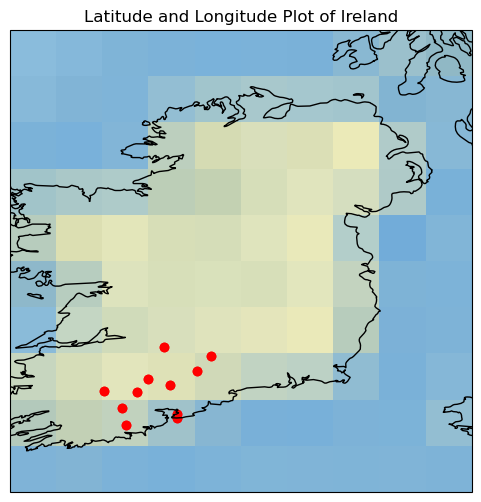

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a map centered around Ireland
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-10, -5, 51, 56])  # Set the extent to focus on Ireland

# Plot latitude and longitude points
lons = df['longitude']  # Longitude values
lats = df['latitude']  # Latitude values

# Plot Ireland map
ax.coastlines(resolution='10m')
ax.stock_img()
#ax.gridlines()

# Plot points
ax.scatter(lons, lats, color='red', marker='o', transform=ccrs.PlateCarree())

# Add labels
#for i in range(len(lons)):
#   ax.text(lons[i]+0.1, lats[i]+0.1, f'({lats[i]}, {lons[i]})', transform=ccrs.PlateCarree())

# Show the plot
plt.title('Latitude and Longitude Plot of Ireland')
plt.show()



In [76]:
data = {'Column1': [[1, 2], [3, 4, 5], [6, 7, 8, 9]]}
df = pd.DataFrame(data)
new_column = []
for sublis in df['Column1']:
    # Iterate over each value in the list
    for value in sublis[:2]:
        print(value)

1
2
3
4
6
7


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import pandas as pd

# Initialize the WebDriver
driver = webdriver.Chrome()  # Ensure you have the ChromeDriver installed and in PATH
driver.get("https://esahkari.bih.nic.in/coop/MIS/Procurement/Report/ProgressRptToViewQTY.aspx")  # Replace with the actual URL of the page

def scrape_dropdown_options(driver, dropdown_id):
    select_element = Select(driver.find_element(By.ID, dropdown_id))
    options = [option.text for option in select_element.options]
    return options

# Specify the dropdown ID
dropdown_id = "ctl00_ContentPlaceHolder1_ddlFinYear"

# Scrape options from the specified dropdown
options = scrape_dropdown_options(driver, dropdown_id)

# Create a DataFrame to store the options
df = pd.DataFrame(options, columns=['Dropdown Options'])

# Print the options
print(df)


  Dropdown Options
0        2023-2024
1        2022-2023
2        2021-2022
3        2020-2021
4        2019-2020
